In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('House price prediction data.csv')
data.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [3]:
data.shape

(2531, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2531 non-null   object 
 1   Location       2531 non-null   object 
 2   Region         2531 non-null   object 
 3   Property_Age   2531 non-null   object 
 4   Availability   2531 non-null   object 
 5   Area_Tpye      2531 non-null   object 
 6   Area_SqFt      2531 non-null   float64
 7   Rate_SqFt      2531 non-null   int64  
 8   Floor_No       2531 non-null   int64  
 9   Bedroom        2531 non-null   int64  
 10  Bathroom       2531 non-null   int64  
 11  Price_Lakh     2531 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 257.1+ KB


In [6]:
data.isnull().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [10]:
data.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0
mean,949.0,16554.0,9.0,2.0,2.0,161.0
std,487.0,10204.0,8.0,1.0,1.0,162.0
min,185.0,1808.0,-1.0,1.0,1.0,13.0
25%,634.0,8751.0,3.0,1.0,2.0,66.0
50%,850.0,13636.0,6.0,2.0,2.0,110.0
75%,1150.0,22314.0,12.0,2.0,2.0,197.0
max,5000.0,55611.0,55.0,6.0,7.0,1900.0


In [11]:
data.drop(columns=['Property_Name','Location','Availability', 'Bathroom'],inplace=True)
print('shape of date:', data.shape)

shape of date: (2531, 8)


In [12]:
le = LabelEncoder()

In [13]:
for column in data.describe(include = 'object').columns:
    data[column] = le.fit_transform(data[column])

In [14]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2531.0,67.56,40.60,0.0,31.0,60.0,107.0,144.0
Property_Age,2531.0,1.30,1.09,0.0,0.0,1.0,2.0,4.0
Area_Tpye,2531.0,1.74,1.18,0.0,1.0,1.0,3.0,3.0
Area_SqFt,2531.0,948.77,486.83,185.0,634.5,850.0,1150.0,5000.0
Rate_SqFt,2531.0,16553.69,10204.27,1808.0,8751.0,13636.0,22314.0,55611.0
Floor_No,2531.0,8.78,7.98,-1.0,3.0,6.0,12.0,55.0
Bedroom,2531.0,1.95,0.83,1.0,1.0,2.0,2.0,6.0
Price_Lakh,2531.0,161.35,162.32,13.0,66.0,110.0,197.0,1900.0


In [15]:
data.sample(10)

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
457,130,0,3,1200.0,8750,3,2,105.0
2019,58,3,3,1625.0,10153,7,3,165.0
2095,80,2,3,1000.0,25500,3,2,255.0
1730,31,0,3,700.0,13857,8,1,97.0
1993,44,2,1,1050.0,21428,12,2,225.0
1576,41,1,3,607.0,6013,14,1,36.5
1707,58,3,3,1500.0,11666,10,3,175.0
2295,24,1,3,910.0,13934,15,2,85.0
2492,47,1,1,450.0,10000,11,1,45.0
602,130,1,1,670.0,8955,2,2,60.0


In [16]:
for i in data.columns:
    print(i, 'Minimum value:', data[i].min(), 'Maximum value', data[i].max())

Region Minimum value: 0 Maximum value 144
Property_Age Minimum value: 0 Maximum value 4
Area_Tpye Minimum value: 0 Maximum value 3
Area_SqFt Minimum value: 185.0 Maximum value 5000.0
Rate_SqFt Minimum value: 1808 Maximum value 55611
Floor_No Minimum value: -1 Maximum value 55
Bedroom Minimum value: 1 Maximum value 6
Price_Lakh Minimum value: 13.0 Maximum value 1900.0


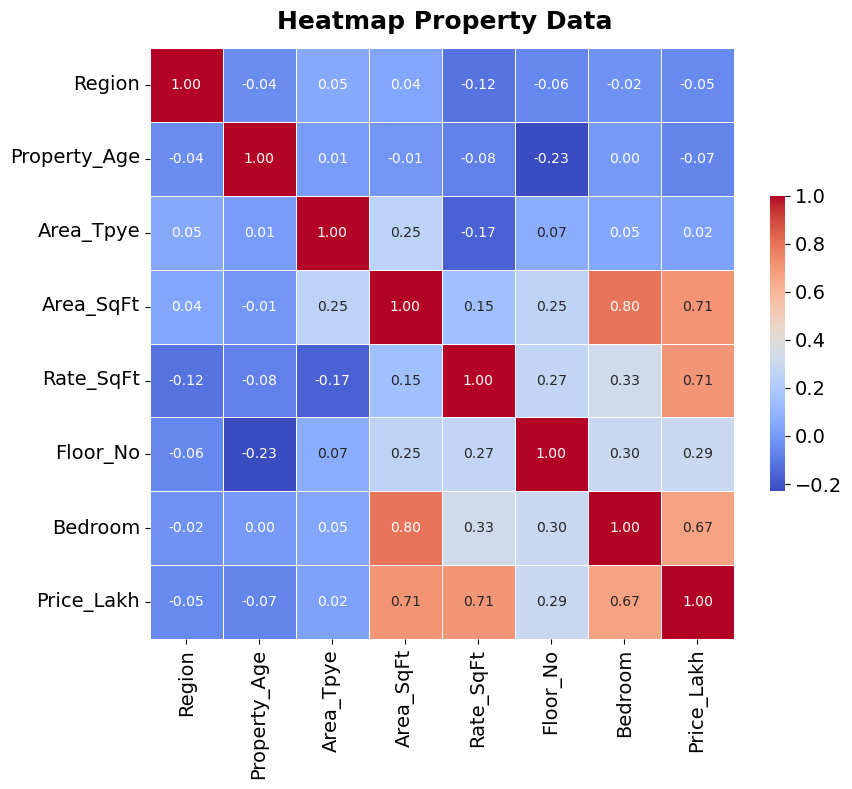

In [26]:
fig = plt.figure(figsize=(9,8))
rcParams = {'xtick.labelsize': '14', 'ytick.labelsize': '14','axes.labelsize': '16'}
sns.heatmap(data.corr(),annot=True, linewidths=.5, cbar_kws={'shrink':.5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Property Data', fontsize=18, fontweight='bold')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

# Model Building

In [27]:
data.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0


In [30]:
X = data.drop('Price_Lakh', axis=1)
y = data['Price_Lakh']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Training Accuracy = ", model.score(X_train, y_train))
print("Test Accuracy     = ", model.score(X_test, y_test))

Training Accuracy =  0.869817396739101
Test Accuracy     =  0.8777898104282529


In [38]:
#Decision Tree Regressor
dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.9602354385489814


In [40]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.9733361213254421
Test Accuracy     =  0.9675251067686964


In [42]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9891900475083127
Test Accuracy     =  0.9862457142837923


In [44]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9823550391635876
Test Accuracy     =  0.9908086170611538


1. We select the final model - Polynomial Feature.
2. We got 98.73 % Model Accuracy.

In [45]:
#Final Model Evaluation

In [46]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [47]:
evaluate(poly_model, X_train, y_train)

Average Error  = 8.3007 degrees
Model Accuracy = 0.9824 %


In [48]:
evaluate(poly_model, X_test, y_test)

Average Error  = 7.5233 degrees
Model Accuracy = 0.9908 %


In [49]:
pred = poly_model.predict(X_test)

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


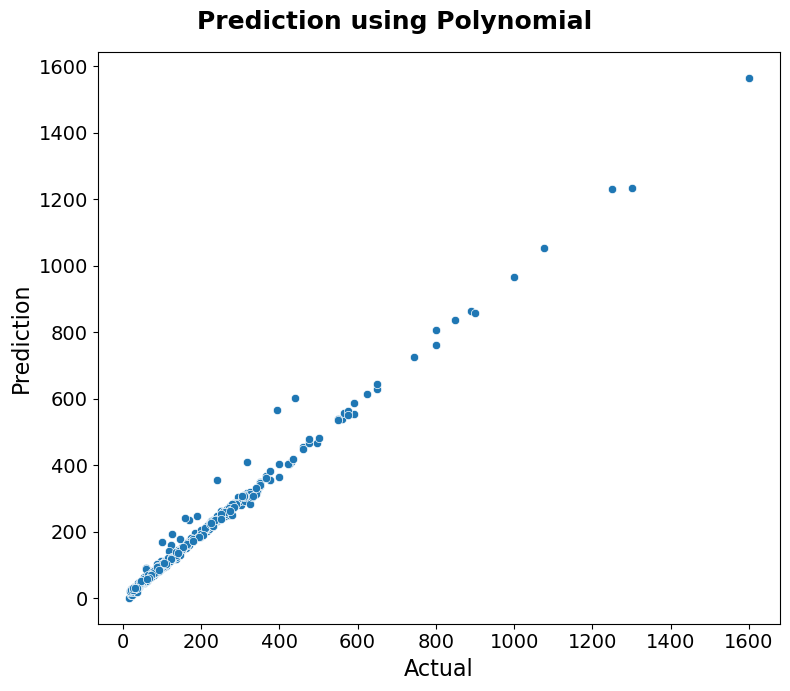

In [50]:
fig = plt.figure(figsize=(8,7))

sns.scatterplot(y_test, pred)
fig.suptitle('Prediction using Polynomial', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#fig.savefig('Prediction_Polynomial', dpi = 500)